In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [5]:
data= pd.read_csv("HepatitisCdata.csv",index_col=0)

In [6]:
data.head() 

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 615 entries, 1 to 615
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 67.3+ KB


In [8]:
nan_value = data.isnull().sum()
nan_value

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [9]:

data.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [10]:

data.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


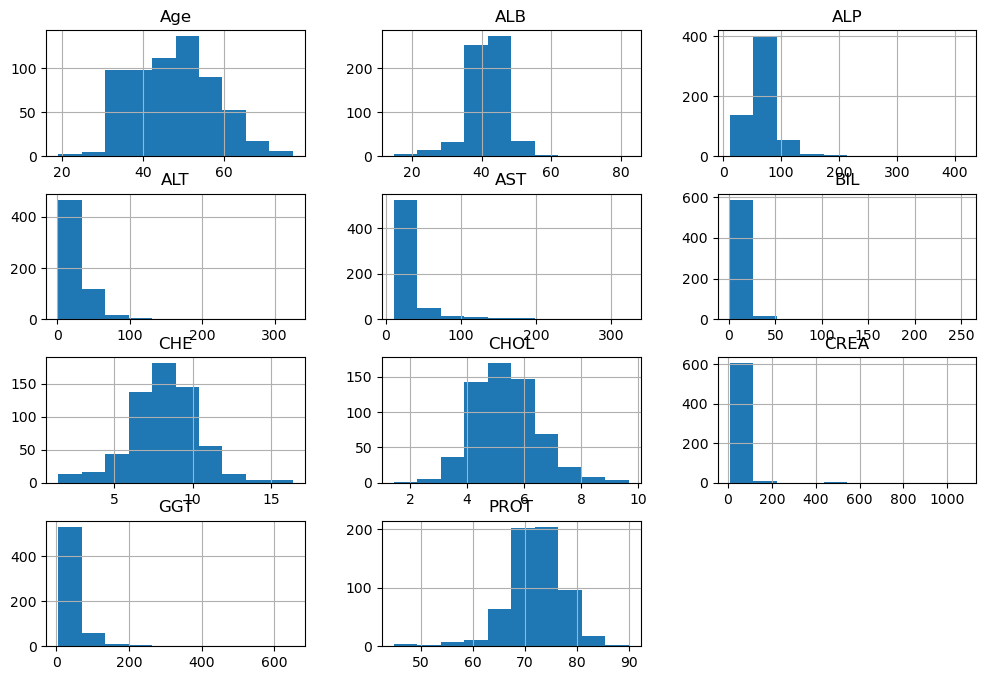

In [11]:
import matplotlib.pyplot as plt
data.hist(figsize=(12, 8))
plt.show()

[Text(0, 0, 'Absent'),
 Text(1, 0, 'Suspected'),
 Text(2, 0, 'Stage 1'),
 Text(3, 0, 'Stage 2'),
 Text(4, 0, 'Stage 3')]

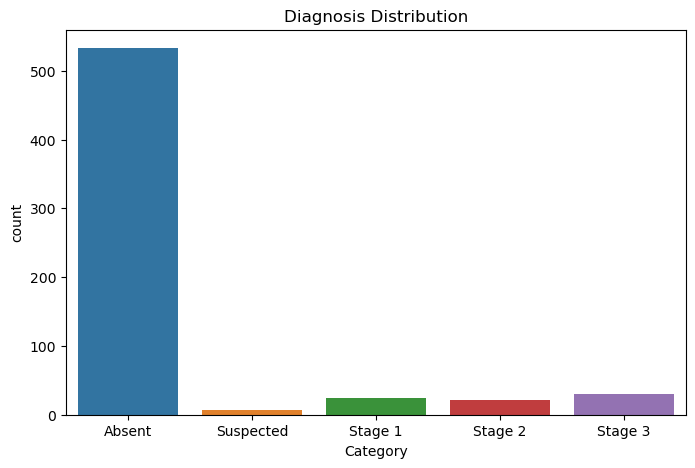

In [12]:
import seaborn as sns
plt.figure(figsize = (8, 5))
distribution = sns.countplot(data, x = "Category")
distribution.set_title("Diagnosis Distribution")
distribution.set_xticklabels(["Absent", "Suspected", "Stage 1", "Stage 2", "Stage 3"])

[Text(0, 0, 'Absent'),
 Text(1, 0, 'Suspected'),
 Text(2, 0, 'Stage 1'),
 Text(3, 0, 'Stage 2'),
 Text(4, 0, 'Stage 3')]

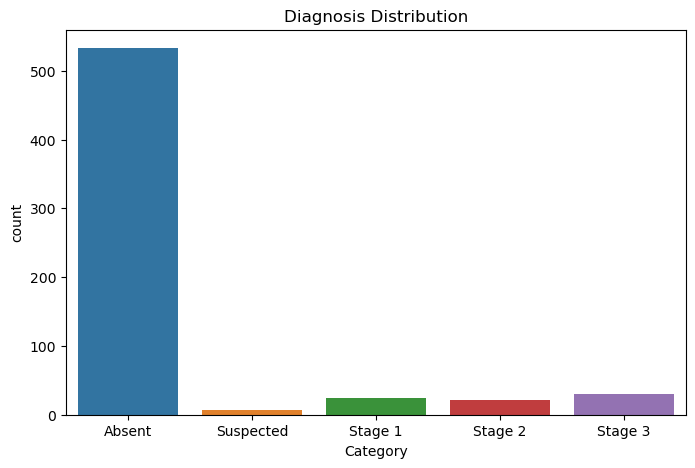

In [13]:
plt.figure(figsize = (8, 5))
distribution = sns.countplot(data, x = "Category")
distribution.set_title("Diagnosis Distribution")
distribution.set_xticklabels(["Absent", "Suspected", "Stage 1", "Stage 2", "Stage 3"])

In [14]:
from sklearn.preprocessing import LabelEncoder
data["Sex"] = data["Sex"].replace("m", 1)
data["Sex"] = data["Sex"].replace("f", 0)
# Create a dictionary to map categories to numeric values


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to "Category" column
data["Category_numeric"] = label_encoder.fit_transform(data["Category"])

In [15]:
data.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category_numeric
1,0=Blood Donor,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0
2,0=Blood Donor,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0
3,0=Blood Donor,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0
4,0=Blood Donor,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0
5,0=Blood Donor,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0


In [16]:
data.Category.value_counts()

Category
0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: count, dtype: int64

In [17]:
nan_value = data.isnull().sum()
nan_value

Category             0
Age                  0
Sex                  0
ALB                  1
ALP                 18
ALT                  1
AST                  0
BIL                  0
CHE                  0
CHOL                10
CREA                 0
GGT                  0
PROT                 1
Category_numeric     0
dtype: int64

In [18]:
data_subset = data.drop(columns=['Category'])
corr_matrix = data_subset.corr()
corr_matrix

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category_numeric
Age,1.000000,-0.024544,-0.197498,0.173340,-0.006021,0.088666,0.032492,-0.075093,0.125641,-0.022296,0.153087,-0.153668,0.106341
Sex,-0.024544,1.000000,0.146140,-0.019825,0.161868,0.130891,0.111177,0.169111,-0.030208,0.159589,0.133276,0.051277,0.060657
ALB,-0.197498,0.146140,1.000000,-0.141584,0.001606,-0.193450,-0.221651,0.375878,0.208248,-0.001573,-0.155749,0.557197,-0.288252
ALP,0.173340,-0.019825,-0.141584,1.000000,0.214480,0.063948,0.056078,0.033753,0.125429,0.149832,0.454630,-0.055109,0.032323
ALT,-0.006021,0.161868,0.001606,0.214480,1.000000,0.273326,-0.038469,0.147000,0.068947,-0.043025,0.248114,0.094730,0.106574
AST,0.088666,0.130891,-0.193450,0.063948,0.273326,1.000000,0.312231,-0.208536,-0.209970,-0.021387,0.491263,0.040071,0.648341
BIL,0.032492,0.111177,-0.221651,0.056078,-0.038469,0.312231,1.000000,-0.333172,-0.180370,0.031224,0.217024,-0.047638,0.473006
CHE,-0.075093,0.169111,0.375878,0.033753,0.147000,-0.208536,-0.333172,1.000000,0.425456,-0.011157,-0.110345,0.295427,-0.329472
CHOL,0.125641,-0.030208,0.208248,0.125429,0.068947,-0.209970,-0.180370,0.425456,1.000000,-0.047744,-0.006895,0.207071,-0.308071
CREA,-0.022296,0.159589,-0.001573,0.149832,-0.043025,-0.021387,0.031224,-0.011157,-0.047744,1.000000,0.121003,-0.031704,0.182040


In [19]:
data['ALB'].fillna(data['ALB'].mean(), inplace=True)
data['ALP'].fillna(data['ALP'].mean(), inplace=True)
data['CHOL'].fillna(data['CHOL'].mean(), inplace=True)
data['PROT'].fillna(data['PROT'].mean(), inplace=True)
data['ALT'].fillna(data['ALT'].mean(), inplace=True)
data.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category_numeric
1,0=Blood Donor,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0
2,0=Blood Donor,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0
3,0=Blood Donor,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0
4,0=Blood Donor,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0
5,0=Blood Donor,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0


In [20]:
nan_value = data.isnull().sum()
nan_value

Category            0
Age                 0
Sex                 0
ALB                 0
ALP                 0
ALT                 0
AST                 0
BIL                 0
CHE                 0
CHOL                0
CREA                0
GGT                 0
PROT                0
Category_numeric    0
dtype: int64

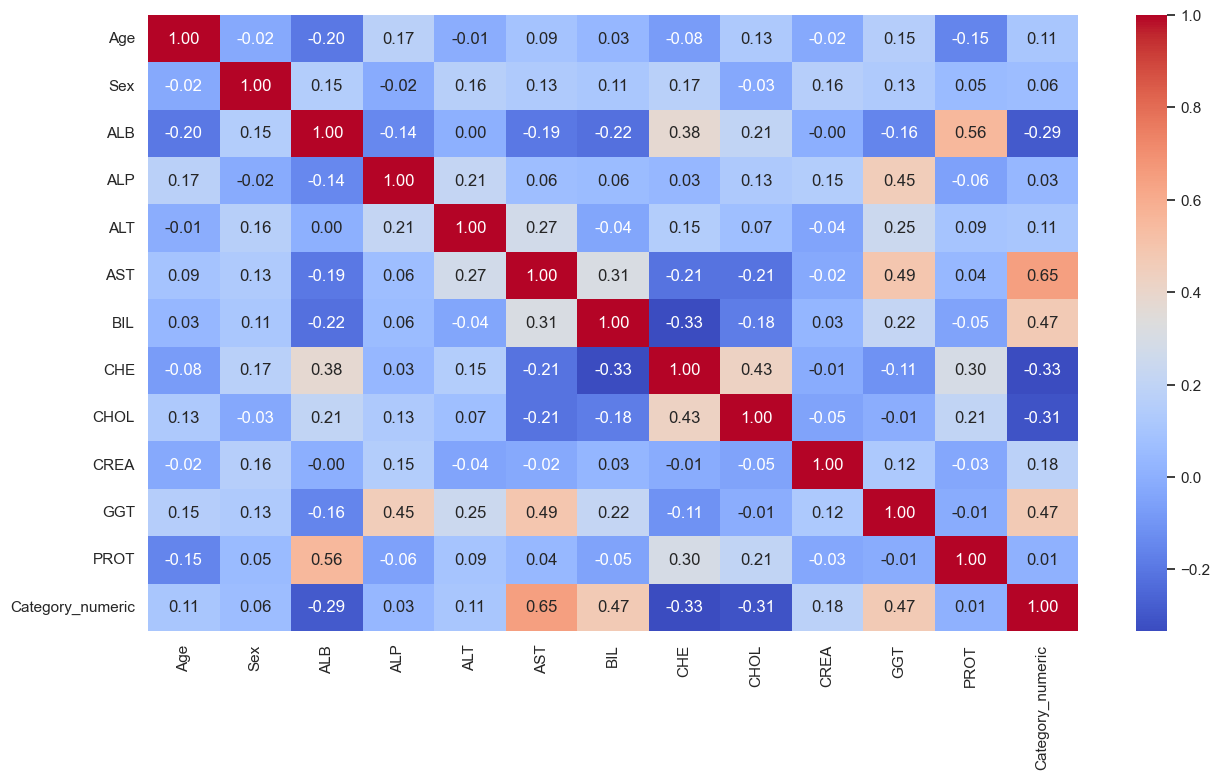

In [21]:
sns.set(rc={'figure.figsize':(15,8)})
table = sns.heatmap(data_subset.corr(), annot=True, fmt = ".2f", cmap = "coolwarm")

/Users/arun/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Diagnosis vs AST')

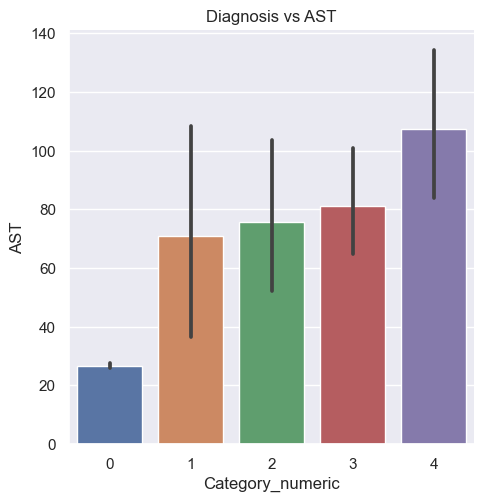

In [22]:
CvsA = sns.catplot(x="Category_numeric", y = "AST",data = data_subset, kind="bar")
plt.title("Diagnosis vs AST")

In [23]:
data_subset.columns.values
data_subset.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category_numeric
1,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0
2,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0
3,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0
4,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0
5,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0


In [24]:
data_subset['ALB'].fillna(data_subset['ALB'].mean(), inplace=True)
data_subset['ALP'].fillna(data_subset['ALP'].mean(), inplace=True)
data_subset['CHOL'].fillna(data_subset['CHOL'].mean(), inplace=True)
data_subset['PROT'].fillna(data_subset['PROT'].mean(), inplace=True)
data_subset['ALT'].fillna(data_subset['ALT'].mean(), inplace=True)
data_subset.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category_numeric
1,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0
2,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0
3,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0
4,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0
5,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# Specify the columns you want to include in the features
feature_columns = ['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL',
       'CREA', 'GGT', 'PROT']
label = 'Category_numeric'

# Extract the features and the target variable
X = data_subset[feature_columns]  # Features
y = data_subset [label]  # Target

# Split the data into training and testing sets
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [26]:
X_train

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
491,55,0,39.9,83.60000,18.4,27.4,8.0,8.43,7.67,73.0,13.6,73.3
109,42,1,45.3,55.30000,31.0,50.0,18.5,15.43,5.88,83.0,15.4,72.4
235,53,1,38.1,82.50000,8.0,17.5,2.4,9.13,6.28,103.0,35.8,69.9
592,46,1,35.0,109.60000,2.3,19.2,11.0,7.10,4.10,1079.1,105.6,69.1
560,58,1,43.0,99.10000,12.2,63.2,13.0,5.95,6.15,147.3,491.0,65.6
...,...,...,...,...,...,...,...,...,...,...,...,...
479,53,0,41.1,91.70000,13.8,19.6,3.4,7.87,5.48,72.0,77.3,77.3
433,48,0,43.7,50.10000,17.3,26.3,8.1,8.15,5.38,64.0,13.4,73.1
547,30,1,45.0,68.28392,66.0,45.0,14.0,12.16,6.10,86.0,43.0,77.0
64,37,1,50.4,48.50000,19.4,27.5,11.6,5.78,4.93,90.0,27.8,75.0


In [27]:
y_train

491    0
109    0
235    0
592    4
560    2
      ..
479    0
433    0
547    2
64     0
348    0
Name: Category_numeric, Length: 553, dtype: int64

In [28]:
# y data
y = data["Category"]
y.head()

1    0=Blood Donor
2    0=Blood Donor
3    0=Blood Donor
4    0=Blood Donor
5    0=Blood Donor
Name: Category, dtype: object

In [29]:
from sklearn.linear_model import LogisticRegression
logistic_model =LogisticRegression()
logistic_model.fit(X_train,y_train)

/Users/arun/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

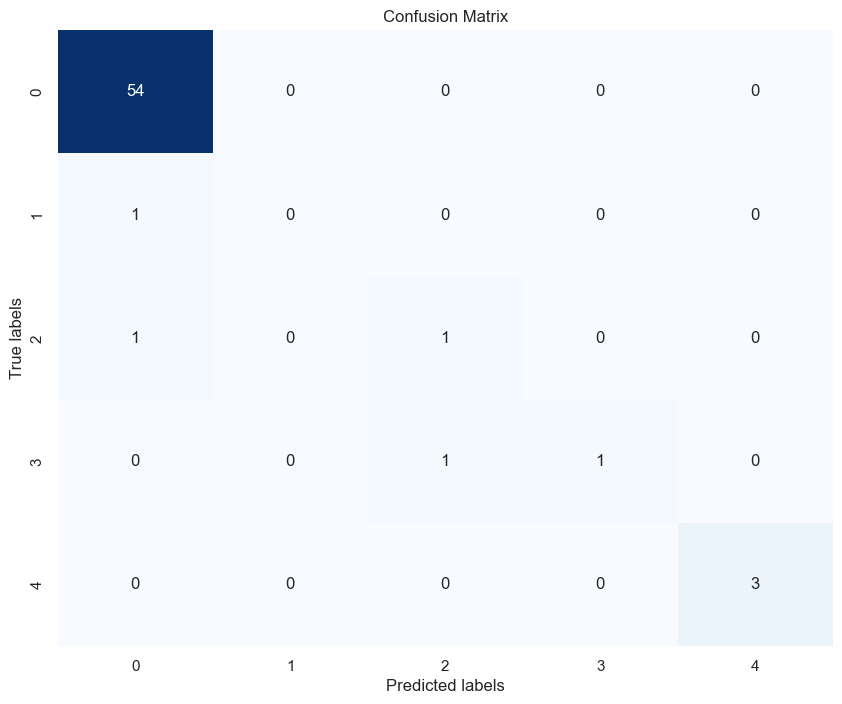

In [30]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have trained your model and made predictions, let's call the predictions 'y_pred'
# Replace 'model' with your trained model

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [31]:
#accuracy test
from sklearn.metrics import accuracy_score
y_pred = logistic_model.predict(X_test)
#Evaluate the model
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy*100}%")

Accuracy: 95.16129032258065%


In [32]:
X_test_list = X_test.iloc[0]
X_test_list

Age     65.00
Sex      0.00
ALB     33.00
ALP     74.30
ALT     13.20
AST     16.80
BIL      4.10
CHE      7.46
CHOL     5.76
CREA    52.00
GGT      9.10
PROT    64.20
Name: 531, dtype: float64

In [33]:
y_pre = logistic_model.predict([X_test_list])
y_pre

/Users/arun/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [34]:
label_encoder.inverse_transform(y_pre)

array(['0=Blood Donor'], dtype=object)

In [35]:
import pickle

filename = "model.pickle"

pickle.dump(logistic_model, open(filename, "wb"))


filename2 = "label_encoder.pickle"

pickle.dump(label_encoder, open(filename2, "wb"))


In [36]:
import pickle

# Load the model from 'model.pkl'
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

# Load the label encoder from 'label_encoder.pkl'
with open('label_encoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)


In [37]:
import pickle

with open('logistic_regression_model.pkl','wb')as f:
    pickle.dump(logistic_model,f)
with open('labe_encoder.pkl','wb') as f:
    pickle.dump(label_encoder,f)